In [1114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel as C)
import statsmodels
from statsmodels import 
from sklearn.metrics import mean_absolute_error

In [1116]:
import statsmodels.api as sm

from statsmodels.tsa.api import SimpleExpSmoothing 

ImportError: cannot import name 'SimpleExpSmoothing'

In [ ]:
statsmodels.

In [1096]:
df=pd.read_csv('~/Desktop/ML/periodic.csv')

In [1097]:
X_df=df["t"] 
y_df=df["Sum"] 

In [1098]:
X_train=np.array(  [X_df.iloc[:28]]  ).T
y_train=np.array([y_df.iloc[:28] ]).T

X_test=np.array([X_df.iloc[28:]]).T
y_test=np.array([y_df.iloc[28:]]).T


In [1099]:
#ExpSine for periodic
##Smooth rising trend is to be explained by an RBF kernel
#The RBF kernel with a large length-scale enforces this component to be smooth; 
#it is not enforced that the trend is rising which leaves this choice to the GP

kernels = [   
    1.0* RBF(length_scale=500) + 
    1.0* RBF(length_scale=50) *
    1.0* ExpSineSquared(length_scale=1.0, periodicity=7.0,length_scale_bounds=(10, 100),periodicity_bounds=(7, 7) ) 
      +    
    1.0* RBF(length_scale=50) *
    1.0*ExpSineSquared(length_scale=1.0, periodicity=7.0,length_scale_bounds=(0.1, 10.0),periodicity_bounds=(7, 7) )
    ,
    
    1.0*Matern(length_scale=1.0, length_scale_bounds=(1, 1000), nu=5)+
    1.0*Matern(length_scale=1.0, length_scale_bounds=(1, 1000), nu=5)*   
      1.0* ExpSineSquared(length_scale=1.0, periodicity=7.0,length_scale_bounds=(1, 100),periodicity_bounds=(7, 7))
    +
   
      1.0* ExpSineSquared(length_scale=1.0, periodicity=7.0,length_scale_bounds=(1, 100),periodicity_bounds=(7, 7))
]


In [1100]:
n_restarts_optimizer=10
gp1 = GaussianProcessRegressor(kernel=kernels[0], n_restarts_optimizer=n_restarts_optimizer)
gp2 = GaussianProcessRegressor(kernel=kernels[1], n_restarts_optimizer=n_restarts_optimizer)
#gp3 = GaussianProcessRegressor(kernel=kernels[2], n_restarts_optimizer=n_restarts_optimizer)
#gp4 = GaussianProcessRegressor(kernel=kernels[3], n_restarts_optimizer=n_restarts_optimizer)


In [1101]:
gp1.fit(X_train, y_train);
gp2.fit(X_train, y_train);
#gp3.fit(X, y);
#gp4.fit(X, y);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.88162278e+09,   3.74558408e+14,  -6.24930055e+07,
         9.40915516e+08,  -6.24930055e+07,   1.24951289e+08,
         1.48931257e+09,   2.43269632e+08,  -1.29105920e+07,
        -3.25405704e+11]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


In [1102]:
pred=np.array([list(range(0,56))]).T
p1=gp1.predict(pred)
p2=gp2.predict(pred)
#p3=gp3.predict(pred)
#p4=gp4.predict(pred)

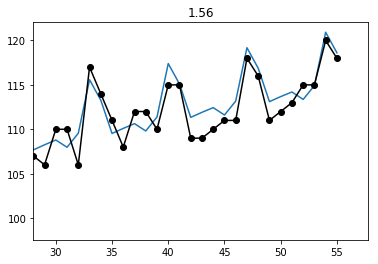

In [1103]:
###  RESULTS VARY BY RUN.  This is sampling 
plt.plot(p1 )
#plt.plot(p2)
#plt.plot(p3) 
#plt.plot(p4)
#plt.scatter(X, y)
plt.scatter(X_train, y_train)
plt.plot(X_test, y_test,'-ok')
mae=mean_absolute_error(y_test, p1[28:])
mae2=mean_absolute_error(y_test, p2[28:])
plt.title( round(mae,2))
plt.xlim(xmin=28)
plt.show()

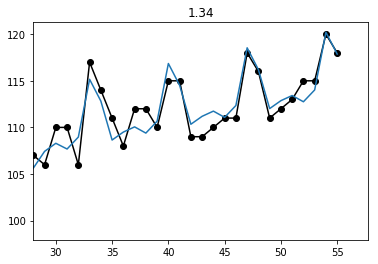

In [1104]:
#gp1.kernel_
plt.plot(X_test, y_test,'-ok')
plt.title( round(mae2,2))
plt.plot(p2)
plt.xlim(xmin=28)
plt.show()

In [1105]:
gp2.kernel_

249**2 * Matern(length_scale=782, nu=5) + 1.64**2 * Matern(length_scale=1, nu=5) * 1.07**2 * ExpSineSquared(length_scale=53, periodicity=7) + 3.47**2 * ExpSineSquared(length_scale=1, periodicity=7)

In [1110]:
gp1.predict(62)

array([[ 120.30874356]])